In [2]:
import pandas as pd
from pandas import Series
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc, roc_auc_score, roc_curve


In [3]:
bank= pd.read_csv('bank.csv')


In [4]:
bank.head(5)

,client_id,education,sex,age,car,car_type,decline_app_cnt,good_work,bki_request_cnt,home_address,work_address,income,foreign_passport,default
0,25905,SCH,M,62,Y,Y,0,0,1,1,2,18000,N,0
1,63161,SCH,F,59,N,N,0,0,3,2,3,19000,N,0
2,25887,SCH,M,25,Y,N,2,0,1,1,2,30000,Y,0
3,16222,SCH,F,53,N,N,0,0,2,2,3,10000,N,0
4,101655,GRD,M,48,N,N,0,1,1,2,3,30000,Y,0


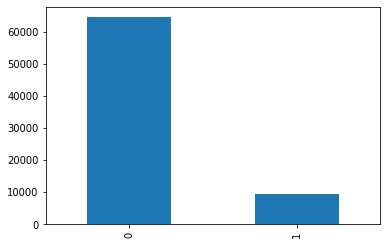

In [5]:
bank.default.value_counts().plot.bar()

In [4]:
bank.info()
client_id	идентификатор клиента
education	уровень образования
sex	пол заёмщика
age	возраст заёмщика
car	флаг наличия автомобиля
car_type	флаг автомобиля-иномарки
decline_app_cnt	количество отказанных прошлых заявок
good_work	флаг наличия «хорошей» работы
bki_request_cnt	количество запросов в БКИ
home_address	категоризатор домашнего адреса
work_address	категоризатор рабочего адреса
income	доход заёмщика
foreign_passport	наличие загранпаспорта
default	наличие дефолта

SyntaxError: invalid syntax (<ipython-input-4-024ab5cbd827>, line 2)

In [6]:
bank.education.value_counts()

SCH    38860
GRD    23365
UGR     9816
PGR     1257
ACD      194
Name: education, dtype: int64

In [7]:
#заполнм пропуски в education самой популярной категорией school, также можно предположить что
#практически все имееют среднее образование
bank.education.fillna('SCH', inplace=True)

In [7]:
bank.columns

Index(['client_id', 'education', 'sex', 'age', 'car', 'car_type',
       'decline_app_cnt', 'good_work', 'bki_request_cnt', 'home_address',
       'work_address', 'income', 'foreign_passport', 'default'],
      dtype='object')

In [8]:
bin_cols=['sex','car','car_type','foreign_passport','good_work']
cat_cols=['education','home_address','work_address']
num_cols=['age','decline_app_cnt','income','bki_request_cnt']    


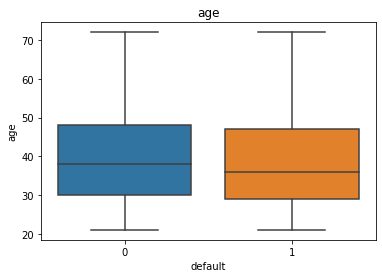

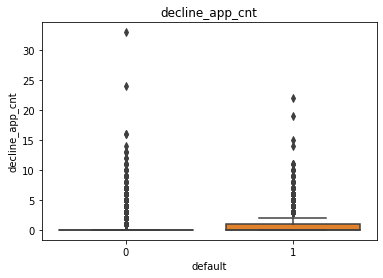

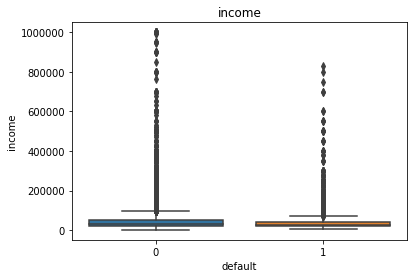

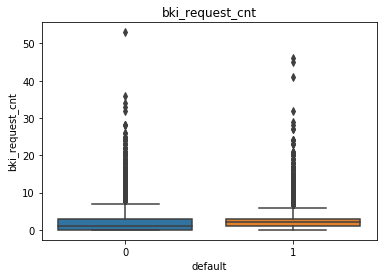

In [10]:
#Задание
#Постройте boxplot’ы для численных переменных

for i in num_cols:
    sns.boxplot(x=bank['default'], y=bank[i])
    plt.title(i)
    plt.show()


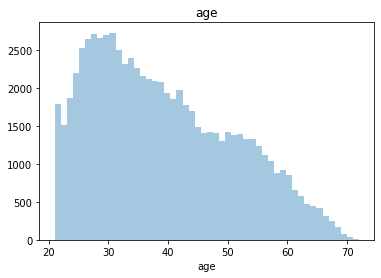

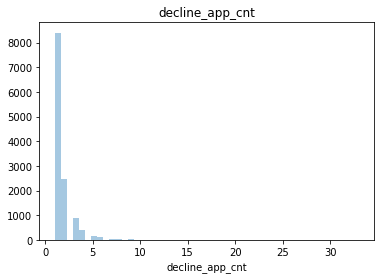

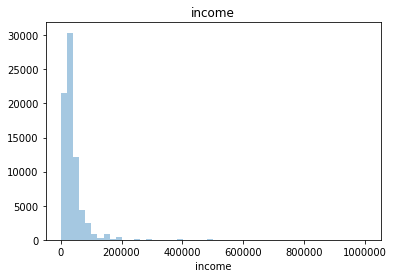

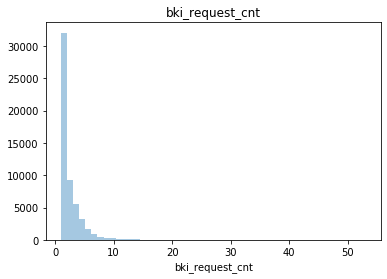

In [11]:
for i in num_cols:
    plt.figure()
    sns.distplot(bank[i][bank[i] > 0].dropna(), kde = False, rug=False)
    plt.title(i)
    plt.show()

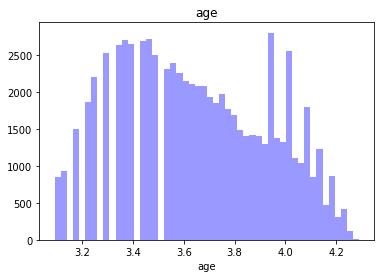

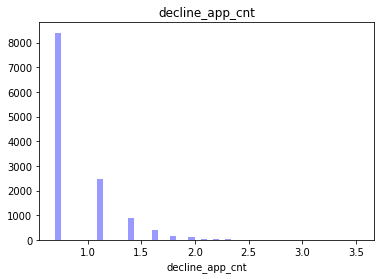

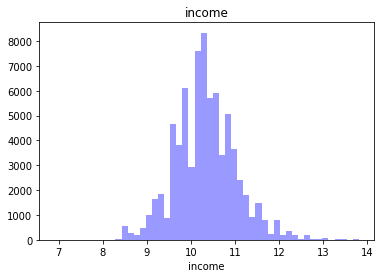

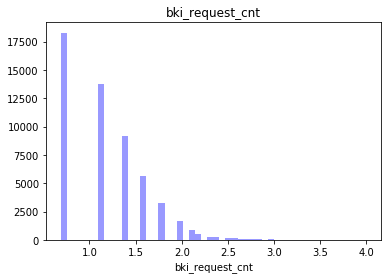

In [8]:
for i in num_cols:
    bank[i] = np.log(bank[i] + 1)
    plt.figure()
    sns.distplot(bank[i][bank[i] > 0].dropna(), kde = False, rug=False, color='b')
    plt.title(i)
    plt.show()

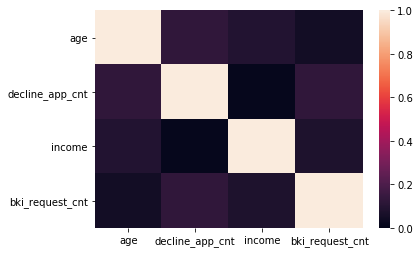

In [13]:
sns.heatmap(bank[num_cols].corr().abs(), vmin=0, vmax=1)

In [9]:
bank[num_cols].corr()
#Все числовые признаки слабо 
#коррелируют между собой, это хорошо для дальнейшего построения модели

,age,decline_app_cnt,income,bki_request_cnt
age,1.000000,-0.111175,-0.018900,0.046265
decline_app_cnt,-0.111175,1.000000,-0.021687,0.155894
income,-0.018900,-0.021687,1.000000,0.082983
bki_request_cnt,0.046265,0.155894,0.082983,1.000000


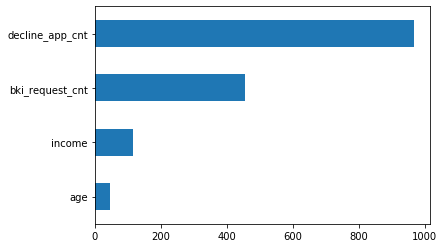

In [10]:
imp_num = Series(f_classif(bank[num_cols], bank['default'])[0], index = num_cols)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh')

In [11]:
# Для бинарных признаков мы будем использовать LabelEncoder

label_encoder = LabelEncoder()

for column in bin_cols:
    bank[column] = label_encoder.fit_transform(bank[column])
    
# убедимся в преобразовании    
bank.head()

,client_id,education,sex,age,car,car_type,decline_app_cnt,good_work,bki_request_cnt,home_address,work_address,income,foreign_passport,default
0,25905,SCH,1,62,1,1,0,0,1,1,2,18000,0,0
1,63161,SCH,0,59,0,0,0,0,3,2,3,19000,0,0
2,25887,SCH,1,25,1,0,2,0,1,1,2,30000,1,0
3,16222,SCH,0,53,0,0,0,0,2,2,3,10000,0,0
4,101655,GRD,1,48,0,0,0,1,1,2,3,30000,1,0


In [12]:
label = LabelEncoder()

bank['education'] = pd.Series(label.fit_transform(bank['education']))
print(dict(enumerate(label.classes_)))

{0: 'ACD', 1: 'GRD', 2: 'PGR', 3: 'SCH', 4: 'UGR'}


In [13]:
bank.head()

,client_id,education,sex,age,car,car_type,decline_app_cnt,good_work,bki_request_cnt,home_address,work_address,income,foreign_passport,default
0,25905,3,1,62,1,1,0,0,1,1,2,18000,0,0
1,63161,3,0,59,0,0,0,0,3,2,3,19000,0,0
2,25887,3,1,25,1,0,2,0,1,1,2,30000,1,0
3,16222,3,0,53,0,0,0,0,2,2,3,10000,0,0
4,101655,1,1,48,0,0,0,1,1,2,3,30000,1,0


In [14]:
bank[num_cols]

,age,decline_app_cnt,income,bki_request_cnt
0,62,0,18000,1
1,59,0,19000,3
2,25,2,30000,1
3,53,0,10000,2
4,48,0,30000,1
...,...,...,...,...
73794,45,0,17000,3
73795,41,0,70000,1
73796,31,0,45000,4
73797,29,0,13000,3


In [15]:
bank['b']=bank['income']/bank['decline_app_cnt']

In [16]:
bank

,client_id,education,sex,age,car,car_type,decline_app_cnt,good_work,bki_request_cnt,home_address,work_address,income,foreign_passport,default,b
0,25905,3,1,62,1,1,0,0,1,1,2,18000,0,0,inf
1,63161,3,0,59,0,0,0,0,3,2,3,19000,0,0,inf
2,25887,3,1,25,1,0,2,0,1,1,2,30000,1,0,15000.0
3,16222,3,0,53,0,0,0,0,2,2,3,10000,0,0,inf
4,101655,1,1,48,0,0,0,1,1,2,3,30000,1,0,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73794,54887,1,0,45,0,0,0,0,3,1,2,17000,0,0,inf
73795,76821,3,1,41,1,1,0,0,1,2,2,70000,0,0,inf
73796,103695,3,1,31,0,0,0,0,4,2,3,45000,0,0,inf
73797,861,3,0,29,0,0,0,1,3,1,3,13000,0,1,inf


In [10]:
bank= pd.get_dummies(bank, prefix=cat_cols, columns=cat_cols)
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73799 entries, 0 to 73798
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         73799 non-null  int64  
 1   sex               73799 non-null  int64  
 2   age               73799 non-null  float64
 3   car               73799 non-null  int64  
 4   car_type          73799 non-null  int64  
 5   decline_app_cnt   73799 non-null  float64
 6   good_work         73799 non-null  int64  
 7   bki_request_cnt   73799 non-null  float64
 8   income            73799 non-null  float64
 9   foreign_passport  73799 non-null  int64  
 10  default           73799 non-null  int64  
 11  education_ACD     73799 non-null  uint8  
 12  education_GRD     73799 non-null  uint8  
 13  education_PGR     73799 non-null  uint8  
 14  education_SCH     73799 non-null  uint8  
 15  education_UGR     73799 non-null  uint8  
 16  home_address_1    73799 non-null  uint8 

In [11]:
bank.head()

,client_id,sex,age,car,car_type,decline_app_cnt,good_work,bki_request_cnt,income,foreign_passport,...,education_GRD,education_PGR,education_SCH,education_UGR,home_address_1,home_address_2,home_address_3,work_address_1,work_address_2,work_address_3
0,25905,1,4.143135,1,1,0.000000,0,0.693147,9.798183,0,...,0,0,1,0,1,0,0,0,1,0
1,63161,0,4.094345,0,0,0.000000,0,1.386294,9.852247,0,...,0,0,1,0,0,1,0,0,0,1
2,25887,1,3.258097,1,0,1.098612,0,0.693147,10.308986,1,...,0,0,1,0,1,0,0,0,1,0
3,16222,0,3.988984,0,0,0.000000,0,1.098612,9.210440,0,...,0,0,1,0,0,1,0,0,0,1
4,101655,1,3.891820,0,0,0.000000,1,0.693147,10.308986,1,...,1,0,0,0,0,1,0,0,0,1


In [19]:
bank.describe()

,client_id,sex,age,car,car_type,decline_app_cnt,good_work,bki_request_cnt,income,foreign_passport,...,education_1,education_2,education_3,education_4,home_address_1,home_address_2,home_address_3,work_address_1,work_address_2,work_address_3
count,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,...,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000
mean,55137.965094,0.436822,39.280641,0.324760,0.189813,0.275749,0.164894,2.000339,41099.775417,0.149948,...,0.316603,0.017033,0.530725,0.133010,0.441537,0.541417,0.017046,0.112928,0.277863,0.609209
std,31841.921168,0.495996,11.520378,0.468288,0.392156,0.804272,0.371087,2.252073,46166.322400,0.357023,...,0.465154,0.129394,0.499058,0.339588,0.496574,0.498285,0.129445,0.316507,0.447948,0.487931
min,1.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1000.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27440.500000,0.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20000.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55274.000000,0.000000,37.000000,0.000000,0.000000,0.000000,0.000000,1.000000,30000.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,82758.500000,1.000000,48.000000,1.000000,0.000000,0.000000,0.000000,3.000000,48000.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,110147.000000,1.000000,72.000000,1.000000,1.000000,33.000000,1.000000,53.000000,1000000.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [44]:
qa = bank['income'].quantile(0.25)  # lower 10%
qb = bank['income'].quantile(0.75) 
print(qa,qb)

20000.0 48000.0


In [20]:
def outliers(column):
    quartile_1, quartile_3 = np.percentile(column, [25, 75])
    iqr = quartile_3 - quartile_1  #находим межквартильное расстояние
    lower_bound = quartile_1 - (iqr * 1.5)  #нижняя граница коробки
    upper_bound = quartile_3 + (iqr * 1.5)  #верхняя граница коробки
    return column[((column > upper_bound) | (column < lower_bound))]

In [50]:
len(outliers(bank.income))/len(bank.income)

0.06361874822152061

In [51]:
len(outliers(bank.age))/len(bank.age)

0.0

In [53]:
len(outliers(bank.decline_app_cnt))/len(bank.decline_app_cnt)

0.17053076599953929

In [54]:
len(outliers(bank.bki_request_cnt))/len(bank.bki_request_cnt)

0.023780810038076396

In [ ]:
len(outliers(bank.income))/len(bank.income)

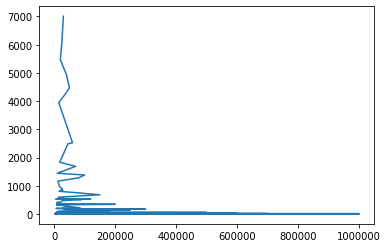

In [37]:
#Постройте boxplot’ы для численных переменных
bank.income.value_counts().plot()


In [25]:
bank['income'].describe()

count      73799.000000
mean       41099.775417
std        46166.322400
min         1000.000000
25%        20000.000000
50%        30000.000000
75%        48000.000000
max      1000000.000000
Name: income, dtype: float64

In [17]:
bank.decline_app_cnt.head()

0    0
1    0
2    2
3    0
4    0
Name: decline_app_cnt, dtype: int64

In [19]:
bank.shape

(73799, 14)

In [12]:
bank.columns


Index(['client_id', 'sex', 'age', 'car', 'car_type', 'decline_app_cnt',
       'good_work', 'bki_request_cnt', 'income', 'foreign_passport', 'default',
       'education_ACD', 'education_GRD', 'education_PGR', 'education_SCH',
       'education_UGR', 'home_address_1', 'home_address_2', 'home_address_3',
       'work_address_1', 'work_address_2', 'work_address_3'],
      dtype='object')

In [23]:
X_cat = OneHotEncoder(sparse = False).fit_transform(bank[cat_cols].values)


In [21]:
bank.columns

Index(['client_id', 'education', 'sex', 'age', 'car', 'car_type',
       'decline_app_cnt', 'good_work', 'bki_request_cnt', 'home_address',
       'work_address', 'income', 'foreign_passport', 'default'],
      dtype='object')

In [13]:
cat=bank[['education_ACD', 'education_GRD', 'education_PGR', 'education_SCH',
       'education_UGR', 'home_address_1', 'home_address_2', 'home_address_3',
       'work_address_1', 'work_address_2', 'work_address_3']]

In [21]:
bank.head()

,client_id,sex,age,car,car_type,decline_app_cnt,good_work,bki_request_cnt,income,foreign_passport,...,education_GRD,education_PGR,education_SCH,education_UGR,home_address_1,home_address_2,home_address_3,work_address_1,work_address_2,work_address_3
0,25905,1,4.143135,1,1,0.000000,0,0.693147,9.798183,0,...,0,0,1,0,1,0,0,0,1,0
1,63161,0,4.094345,0,0,0.000000,0,1.386294,9.852247,0,...,0,0,1,0,0,1,0,0,0,1
2,25887,1,3.258097,1,0,1.098612,0,0.693147,10.308986,1,...,0,0,1,0,1,0,0,0,1,0
3,16222,0,3.988984,0,0,0.000000,0,1.098612,9.210440,0,...,0,0,1,0,0,1,0,0,0,1
4,101655,1,3.891820,0,0,0.000000,1,0.693147,10.308986,1,...,1,0,0,0,0,1,0,0,0,1


In [14]:
# Стандартизация числовых переменных

X_num = StandardScaler().fit_transform(bank[num_cols].values)

In [15]:
X = np.hstack([X_num, bank[bin_cols].values, cat.values])

In [16]:
Y = bank['default'].values

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [18]:
len(X_train)

59039

In [19]:
len(X_test)

14760

In [29]:
from sklearn import svm, datasets

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


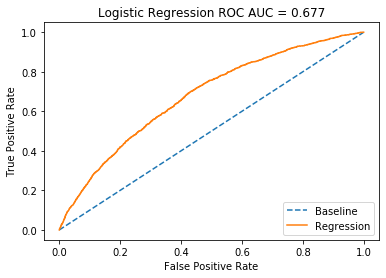

In [20]:
model = LogisticRegression()
model.fit(X_train, y_train)

probs = model.predict_proba(X_test)
probs = probs[:,1]


fpr, tpr, threshold = roc_curve(y_test, probs)
roc_auc = roc_auc_score(y_test, probs)

plt.figure()
plt.plot([0, 1], label='Baseline', linestyle='--')
plt.plot(fpr, tpr, label = 'Regression')
plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

In [23]:
# инструмент для создания и обучения модели
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics 

In [24]:
# Создаём модель
regr = RandomForestRegressor(n_estimators=100)

# Обучаем модель на тестовом наборе данных
regr.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = regr.predict(X_test)

In [25]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.22586758584899036


In [27]:
from sklearn.model_selection import GridSearchCV

# Добавим типы регуляризации
penalty = ['l1', 'l2']

#penalty = ['elasticnet', 'l2']
# Зададим ограничения для параметра регуляризации
C = np.logspace(0, 4, 10)

class_weight = ['balanced', None]

# Создадим гиперпараметры
hyperparameters = dict(C=C, penalty=penalty,class_weight=class_weight)

model = LogisticRegression()
model.fit(X_train, y_train)

# Создаем сетку поиска с использованием 5-кратной перекрестной проверки
clf = GridSearchCV(model, hyperparameters, cv=5, verbose=0)

best_model = clf.fit(X_train, y_train)

# View best hyperparameters
print('Лучшее Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Лучшее C:', best_model.best_estimator_.get_params()['C'])
print('Лучшее class_weight:', best_model.best_estimator_.get_params()['class_weight'])

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/

Лучшее Penalty: l2
Лучшее C: 1.0
Лучшее class_weight: None


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


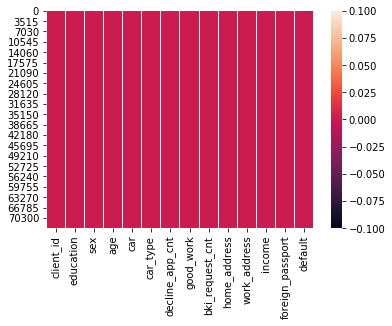

In [32]:
sns.heatmap(bank.isnull())

In [33]:
#проанализируем выбросы
bank[num_cols].describe()

,age,decline_app_cnt,income,bki_request_cnt
count,73799.000000,73799.000000,73799.000000,73799.000000
mean,39.280641,0.275749,41099.775417,2.000339
std,11.520378,0.804272,46166.322400,2.252073
min,21.000000,0.000000,1000.000000,0.000000
25%,30.000000,0.000000,20000.000000,0.000000
50%,37.000000,0.000000,30000.000000,1.000000
75%,48.000000,0.000000,48000.000000,3.000000
max,72.000000,33.000000,1000000.000000,53.000000
